# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [1]:
!git clone https://github.com/AbdelrhmanElsaied/ml-1
%cd  ml-1/linear_regression

Cloning into 'ml-1'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 112 (delta 55), reused 112 (delta 55), pack-reused 0 (from 0)
Receiving objects: 100% (112/112), 29.74 MiB | 15.25 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/ml-1/linear_regression


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


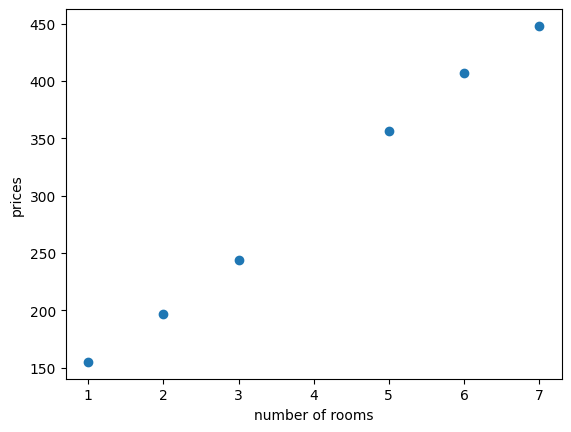

In [4]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Square trick
- Absolute trick

## Simple trick

In [ ]:
# base_price -> c
# price_per_room -> m
# num_rooms -> x
# price -> y

In [ ]:
# def simple_trick(base_price, price_per_room, num_rooms, price):

#     small_random_1 = random.random()*0.1
#     small_random_2 = random.random()*0.1

#     predicted_price = base_price + price_per_room*num_rooms

#     if price > predicted_price and num_rooms > 0:
#         price_per_room += small_random_1
#         base_price += small_random_2
#     if price > predicted_price and num_rooms < 0:
#         price_per_room -= small_random_1
#         base_price += small_random_2
#     if price < predicted_price and num_rooms > 0:
#         price_per_room -= small_random_1
#         base_price -= small_random_2
#     if price < predicted_price and num_rooms < 0:
#         price_per_room -= small_random_1
#         base_price += small_random_2
#     return price_per_room, base_price

In [ ]:
# def simple_trick(c, m, x, y):

#     small_random_1 = random.random()*0.1
#     small_random_2 = random.random()*0.1

#     y_hat = c + m*x

#     if y > y_hat and x > 0:
#         m += small_random_1
#         c += small_random_2
#     if y > y_hat and x < 0:
#         m -= small_random_1
#         c += small_random_2
#     if y < y_hat and x > 0:
#         m -= small_random_1
#         c -= small_random_2
#     if y < y_hat and x < 0:
#         m += small_random_1
#         c -= small_random_2
#     return m, c

In [5]:
def simple_trick(base_price, price_per_room, num_rooms, price):

    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1

    predicted_price = base_price + price_per_room*num_rooms

    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room += small_random_1
        base_price -= small_random_2
    return price_per_room, base_price

## Square trick

In [ ]:
# base_price -> c
# price_per_room -> m
# num_rooms -> x
# price -> y

In [ ]:
# def square_trick(c, m, x, y, learning_rate):
#     ## TODO ##
#     #implement square_trick and return the new price_per_room and base_price
#     # calculate the predicted price then calculate the new price_per_room and base_price

#     y_hat = c + m * x
#     error = y - y_hat
#     m = m + learning_rate * error * x
#     c = c + learning_rate * error

#     return m, c

In [6]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price

    # predicted_price = base_price + price_per_room * num_rooms
    error = price - predicted_price
    price_per_room = price_per_room + learning_rate * error * num_rooms
    base_price = base_price + learning_rate * error

    return price_per_room, base_price

## Absolute trick

In [7]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price

    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

In [8]:
# import random as rd

# # We set the random seed in order to always get the same results.
# random.seed(0)

# def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
#     price_per_room =  random.random() # start with random weight
#     base_price =  random.random() # start with random bias
#     ## TODO ##
#     # for this number of epochs
#     # get a random datasample of our dataset(x,y)
#     # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price

#     utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
#     utils.plot_points(features, labels)
#     print('Price per room:', price_per_room)
#     print('Base price:', base_price)
#     return price_per_room, base_price

# # This line is for the x-axis to appear in the figure
# plt.ylim(0,500)

# linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

In [9]:
import random as rd
import matplotlib.pyplot as plt
import utils  # assuming your utils file has draw_line and plot_points

# We set the random seed in order to always get the same results.
rd.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    price_per_room = rd.random()  # start with random weight
    base_price = rd.random()      # start with random bias

    for epoch in range(epochs):
        # get a random data sample
        idx = rd.randint(0, len(features) - 1)
        num_rooms = features[idx]
        price = labels[idx]

        # update parameters using square_trick (already defined elsewhere)
        price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate)

        # draw red lines for iterations
        # utils.draw_line(price_per_room, base_price, 'red', starting=0, ending=8)

    # draw final line in black
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8, linewidth=2)

    # plot dataset points
    utils.plot_points(features, labels)

    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

NameError: name 'predicted_price' is not defined

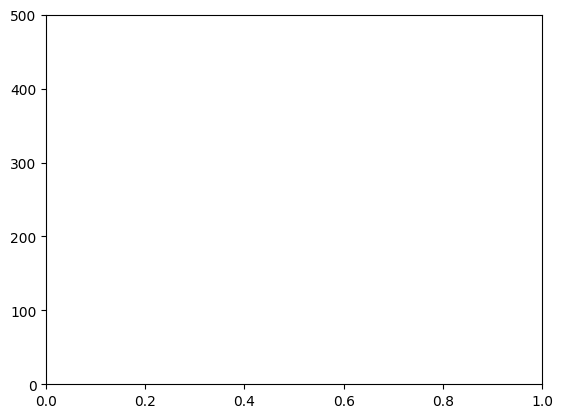

In [10]:
# This line is for the y-axis range in the figure
plt.ylim(0, 500)

linear_regression(features, labels, learning_rate=0.01, epochs=1000)

NameError: name 'predicted_price' is not defined

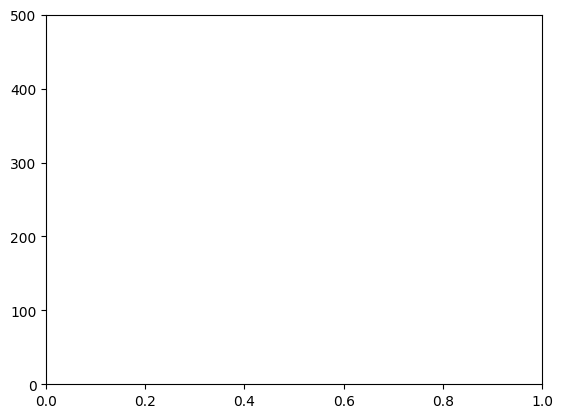

In [11]:
# This line is for the y-axis range in the figure
plt.ylim(0, 500)

linear_regression(features, labels, learning_rate=0.01, epochs=500)

Price per room: 49.79710671462793
Base price: 96.07541109738881


(np.float64(49.79710671462793), np.float64(96.07541109738881))

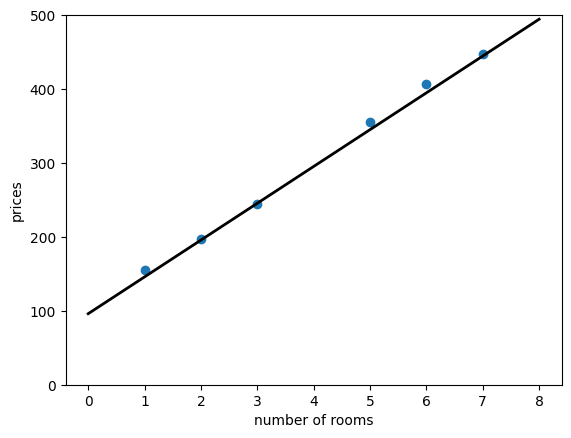

In [ ]:
# This line is for the y-axis range in the figure
plt.ylim(0, 500)

linear_regression(features, labels, learning_rate=0.03, epochs=500)

Price per room: 64.97026570369533
Base price: 21.150158117759464


(np.float64(64.97026570369533), np.float64(21.150158117759464))

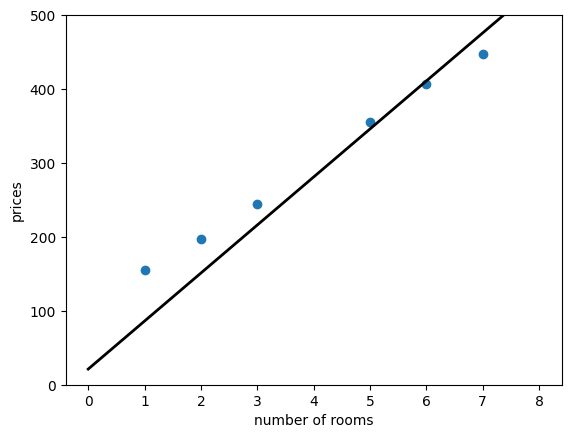

In [ ]:
# This line is for the y-axis range in the figure
plt.ylim(0, 500)

linear_regression(features, labels, learning_rate=0.001, epochs=500)

Price per room: 52.08614200648847
Base price: 90.03255354786764


(np.float64(52.08614200648847), np.float64(90.03255354786764))

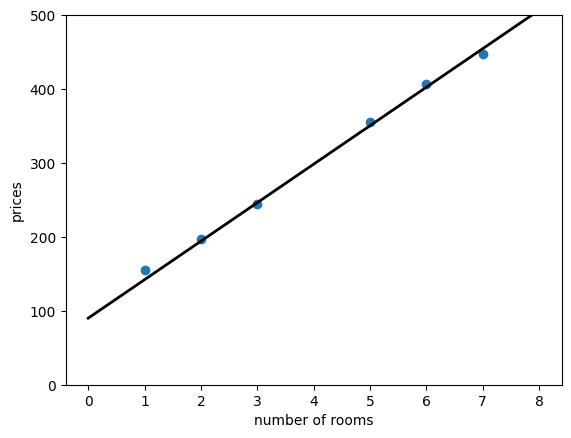

In [ ]:
# This line is for the y-axis range in the figure
plt.ylim(0, 500)

linear_regression(features, labels, learning_rate=0.001, epochs=10000)

### Root mean squared error function

In [ ]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    error = labels - predictions
    error = np.square(error)
    error = np.mean(error)
    error = np.sqrt(error)

    return error

### Plotting the error function

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

NameError: name 'error' is not defined

### Linear regression using sklearn



In [ ]:
## TODO ##
# Use sklearn to implement linear regression that fit our data (features, labels)


In [ ]:
## TODO ##
# print the coefficients and bias of this model


In [ ]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms


### Normal Equation



In [ ]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features

    return W

W = Normal_Equation(features,labels)
print(W)

### Real Example (Predict fuel efficiency)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

#### Clean data

In [ ]:
dataset.isna().sum()

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

In [ ]:
dataset.head()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
dataset.head()

In [ ]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [ ]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [ ]:
# use single-variable input to fit linear regression model

In [ ]:
# use multi-variable input to fit linear regression model

In [ ]:
# use Normalized mlti-variable input to fit linear regression model